<a href="https://colab.research.google.com/github/kdemertzis/LNexamples/blob/main/R_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
install.packages(c("tidyverse"), dependencies = TRUE)
install.packages(c("magrittr"), dependencies = TRUE)
install.packages(c("cluster"), dependencies = TRUE)
install.packages(c("cluster.datasets"), dependencies = TRUE)
install.packages(c("cowplot"), dependencies = TRUE)
install.packages(c("NbClust"), dependencies = TRUE)
install.packages(c("clValid"), dependencies = TRUE)
install.packages(c("ggfortify"), dependencies = TRUE)
install.packages(c("clustree"), dependencies = TRUE)
install.packages(c("dendextend"), dependencies = TRUE)
install.packages(c("car"), dependencies = TRUE)
install.packages(c("factoextra"), dependencies = TRUE)
install.packages(c("FactoMineR"), dependencies = TRUE)
install.packages(c("corrplot"), dependencies = TRUE)
install.packages(c("GGally"), dependencies = TRUE)
install.packages(c("ggiraphExtra"), dependencies = TRUE)
install.packages(c("knitr"), dependencies = TRUE)
install.packages(c("kableExtra"), dependencies = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘covr’, ‘feather’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘formatR’, ‘proxy’, ‘lambda.r’, ‘futile.options’, ‘e1071’, ‘textshaping’, ‘futile.logger’, ‘Cairo’, ‘gridGraphics’, ‘magick’, ‘PASWR’, ‘patchwork’, ‘ragg’, ‘vdiffr’, ‘VennDiagram’


Warning message in install.packages(c("cowplot"), dependencies = TRUE):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages(c("cowplot"), dependencies = TRUE):
“installation of package ‘Cairo’ had non-zero exit status”
Warning message in install.packages(c("cowplot"),

In [3]:
library(tidyverse)
library(magrittr)
library(cluster)
library(cluster.datasets)
library(cowplot)
library(NbClust)
library(clValid)
library(ggfortify)
library(clustree)
library(dendextend)
library(factoextra)
library(FactoMineR)
library(corrplot)
library(GGally)
library(ggiraphExtra)
library(knitr)
library(kableExtra)

ERROR: ignored

In [6]:
data("all.mammals.milk.1956")
raw_mammals <- all.mammals.milk.1956
# subset dataset
mammals <- raw_mammals %>% select(-name) # set rownames
mammals <- as_tibble(mammals)

In [7]:
# Glimpse the data set
glimpse(mammals)

Rows: 25
Columns: 5
$ water   <dbl> 90.1, 88.5, 88.4, 90.3, 90.4, 87.7, 86.9, 82.1, 81.9, 81.6, 81…
$ protein <dbl> 2.6, 1.4, 2.2, 1.7, 0.6, 3.5, 4.8, 5.9, 7.4, 10.1, 6.6, 3.9, 2…
$ fat     <dbl> 1.0, 3.5, 2.7, 1.4, 4.5, 3.4, 1.7, 7.9, 7.2, 6.3, 5.9, 3.2, 1.…
$ lactose <dbl> 6.9, 6.0, 6.4, 6.2, 4.4, 4.8, 5.7, 4.7, 2.7, 4.4, 4.9, 5.6, 5.…
$ ash     <dbl> 0.35, 0.24, 0.18, 0.40, 0.10, 0.71, 0.90, 0.78, 0.85, 0.75, 0.…


In [11]:
colnames(mammals) <- c("V1", "V2", "V3", "V4", "V5")

In [12]:
# Glimpse the data set
glimpse(mammals)

Rows: 25
Columns: 5
$ V1 <dbl> 90.1, 88.5, 88.4, 90.3, 90.4, 87.7, 86.9, 82.1, 81.9, 81.6, 81.6, 8…
$ V2 <dbl> 2.6, 1.4, 2.2, 1.7, 0.6, 3.5, 4.8, 5.9, 7.4, 10.1, 6.6, 3.9, 2.0, 7…
$ V3 <dbl> 1.0, 3.5, 2.7, 1.4, 4.5, 3.4, 1.7, 7.9, 7.2, 6.3, 5.9, 3.2, 1.8, 5.…
$ V4 <dbl> 6.9, 6.0, 6.4, 6.2, 4.4, 4.8, 5.7, 4.7, 2.7, 4.4, 4.9, 5.6, 5.5, 3.…
$ V5 <dbl> 0.35, 0.24, 0.18, 0.40, 0.10, 0.71, 0.90, 0.78, 0.85, 0.75, 0.93, 0…


In [13]:
# Summary of data set
summary(mammals) 

       V1              V2               V3              V4       
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
       V5        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8292  
 3rd Qu.:0.9300  
 Max.   :2.3000  

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



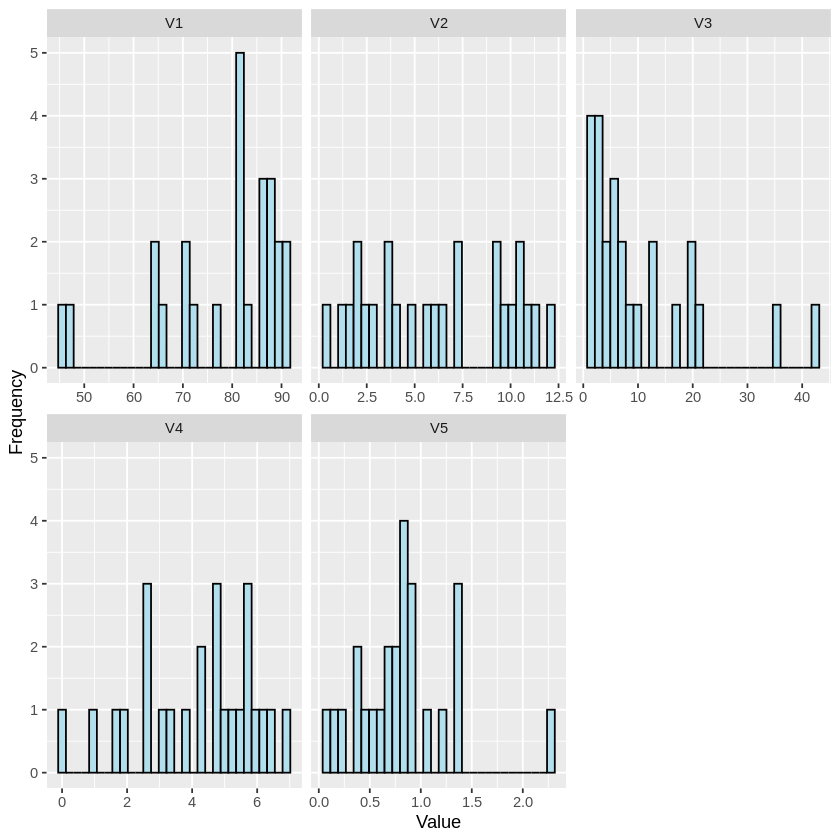

In [14]:
# Historgram for each attribute
mammals %>% 
  gather(Attributes, value, 1:5) %>% 
  ggplot(aes(x=value)) +
  geom_histogram(fill = "lightblue2", color = "black") + 
  facet_wrap(~Attributes, scales = "free_x") +
  labs(x = "Value", y = "Frequency")

In [15]:
corrplot(cor(mammals), type = "upper", method = "ellipse", tl.cex = 0.9)

ERROR: ignored

In [16]:
mammals_scaled <- scale(mammals)
rownames(mammals_scaled) <- raw_mammals$name

In [17]:
res.pca <- PCA(mammals_scaled,  graph = FALSE)
# Visualize eigenvalues/variances
fviz_screeplot(res.pca, addlabels = TRUE, ylim = c(0, 50))

ERROR: ignored

In [18]:
# Extract the results for variables
var <- get_pca_var(res.pca)
# Contributions of variables to PC1
fviz_contrib(res.pca, choice = "var", axes = 1, top = 10)
# Contributions of variables to PC2
fviz_contrib(res.pca, choice = "var", axes = 2, top = 10)
# Control variable colors using their contributions to the principle axis
fviz_pca_var(res.pca, col.var="contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Avoid text overlapping
             ) + theme_minimal() + ggtitle("Variables - PCA")

ERROR: ignored

In [19]:
km2 <- kmeans(mammals_scaled, centers = 2, nstart = 30)

In [ ]:
kmean_calc <- function(df, ...){
  kmeans(df, scaled = ..., nstart = 30)
}
km2 <- kmean_calc(mammals_scaled, 2)
km3 <- kmean_calc(mammals_scaled, 3)
km4 <- kmeans(mammals_scaled, 4)
km5 <- kmeans(mammals_scaled, 5)
km6 <- kmeans(mammals_scaled, 6)
km7 <- kmeans(mammals_scaled, 7)
km8 <- kmeans(mammals_scaled, 8)
km9 <- kmeans(mammals_scaled, 9)
km10 <- kmeans(mammals_scaled, 10)
km11 <- kmeans(mammals_scaled, 11)
p1 <- fviz_cluster(km2, data = mammals_scaled, frame.type = "convex") + theme_minimal() + ggtitle("k = 2") 
p2 <- fviz_cluster(km3, data = mammals_scaled, frame.type = "convex") + theme_minimal() + ggtitle("k = 3")
p3 <- fviz_cluster(km4, data = mammals_scaled, frame.type = "convex") + theme_minimal() + ggtitle("k = 4")
p4 <- fviz_cluster(km5, data = mammals_scaled, frame.type = "convex") + theme_minimal() + ggtitle("k = 5")
p5 <- fviz_cluster(km6, data = mammals_scaled, frame.type = "convex") + theme_minimal() + ggtitle("k = 6")
p6 <- fviz_cluster(km7, data = mammals_scaled, frame.type = "convex") + theme_minimal() + ggtitle("k = 7")
plot_grid(p1, p2, p3, p4, p5, p6, labels = c("k2", "k3", "k4", "k5", "k6", "k7"))

In [ ]:
set.seed(31)
# function to compute total within-cluster sum of squares
fviz_nbclust(mammals_scaled, kmeans, method = "wss", k.max = 24) + theme_minimal() + ggtitle("the Elbow Method")

In [ ]:
gap_stat <- clusGap(mammals_scaled, FUN = kmeans, nstart = 30, K.max = 24, B = 50)
fviz_gap_stat(gap_stat) + theme_minimal() + ggtitle("fviz_gap_stat: Gap Statistic")

In [ ]:
fviz_nbclust(mammals_scaled, kmeans, method = "silhouette", k.max = 24) + theme_minimal() + ggtitle("The Silhouette Plot")

In [ ]:
ssc <- data.frame(
  kmeans = c(2,3,4,5,6,7,8),
  within_ss = c(mean(km2$withinss), mean(km3$withinss), mean(km4$withinss), mean(km5$withinss), mean(km6$withinss), mean(km7$withinss), mean(km8$withinss)),
  between_ss = c(km2$betweenss, km3$betweenss, km4$betweenss, km5$betweenss, km6$betweenss, km7$betweenss, km8$betweenss)
)
ssc %<>% gather(., key = "measurement", value = value, -kmeans)
#ssc$value <- log10(ssc$value)
ssc %>% ggplot(., aes(x=kmeans, y=log10(value), fill = measurement)) + geom_bar(stat = "identity", position = "dodge") + ggtitle("Cluster Model Comparison") + xlab("Number of Clusters") + ylab("Log10 Total Sum of Squares") + scale_x_discrete(name = "Number of Clusters", limits = c("0", "2", "3", "4", "5", "6", "7", "8"))

In [ ]:
res.nbclust <- NbClust(mammals_scaled, distance = "euclidean",
                  min.nc = 2, max.nc = 9, 
                  method = "complete", index ="all")
factoextra::fviz_nbclust(res.nbclust) + theme_minimal() + ggtitle("NbClust's optimal number of clusters")

In [ ]:
tmp <- NULL
for (k in 1:11){
  tmp[k] <- kmeans(mammals_scaled, k, nstart = 30)
}
df <- data.frame(tmp)
# add a prefix to the column names
colnames(df) <- seq(1:11)
colnames(df) <- paste0("k",colnames(df))
# get individual PCA
df.pca <- prcomp(df, center = TRUE, scale. = FALSE)
ind.coord <- df.pca$x
ind.coord <- ind.coord[,1:2]
df <- bind_cols(as.data.frame(df), as.data.frame(ind.coord))
clustree(df, prefix = "k")

In [ ]:
df_subset <- df %>% select(1:8,12:13)
clustree_overlay(df_subset, prefix = "k", x_value = "PC1", y_value = "PC2")

In [ ]:
overlay_list <- clustree_overlay(df_subset, prefix = "k", x_value = "PC1",
                                 y_value = "PC2", plot_sides = TRUE)
overlay_list$x_side
overlay_list$y_side

In [ ]:
intern <- clValid(mammals_scaled, nClust = 2:24, 
              clMethods = c("hierarchical","kmeans","pam"), validation = "internal")
# Summary
summary(intern) %>% kable() %>% kable_styling()

In [ ]:
# Compute dissimilarity matrix with euclidean distances
d <- dist(mammals_scaled, method = "euclidean")
# Hierarchical clustering using Ward's method
res.hc <- hclust(d, method = "ward.D2" )
# Cut tree into 5 groups
grp <- cutree(res.hc, k = 5)
# Visualize
plot(res.hc, cex = 0.6) # plot tree
rect.hclust(res.hc, k = 5, border = 2:5) # add rectangle

In [ ]:
# Execution of k-means with k=5
final <- kmeans(mammals_scaled, 5, nstart = 30)
fviz_cluster(final, data = mammals_scaled) + theme_minimal() + ggtitle("k = 5")

In [ ]:
as.data.frame(mammals_scaled) %>% mutate(Cluster = final$cluster) %>% group_by(Cluster) %>% summarise_all("mean") %>% kable() %>% kable_styling()